# Image Classification Ciffar10 Dataset | Multiple Image Classification CNN | ANN CIFFAR10

In this project, you’ll create an image classification system that can determine the image’s class. Because image classification is such an important application in the field of deep learning, working on this project will allow you to learn about a variety of deep learning topics.

Working on image categorization is one of the finest ways to get started with hands-on deep learning projects for students. CIFAR-10 is a big dataset including approximately 60,000 color images (3232 sizes) divided into ten classes, each with 6,000 images. There are 50,000 photos in the training set and 10,000 images in the test set. The training set will be divided into five portions, each containing 10,000 photos that will be organized in random order. The test set will consist of 1000 photos selected at random from each of the ten classes.

# Import Tools

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Setting Constant

In [2]:
batch_size = 32
num_classes = 10
data_augmentation = True

# The data, shuffled and split between train and test sets:

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Showing Images

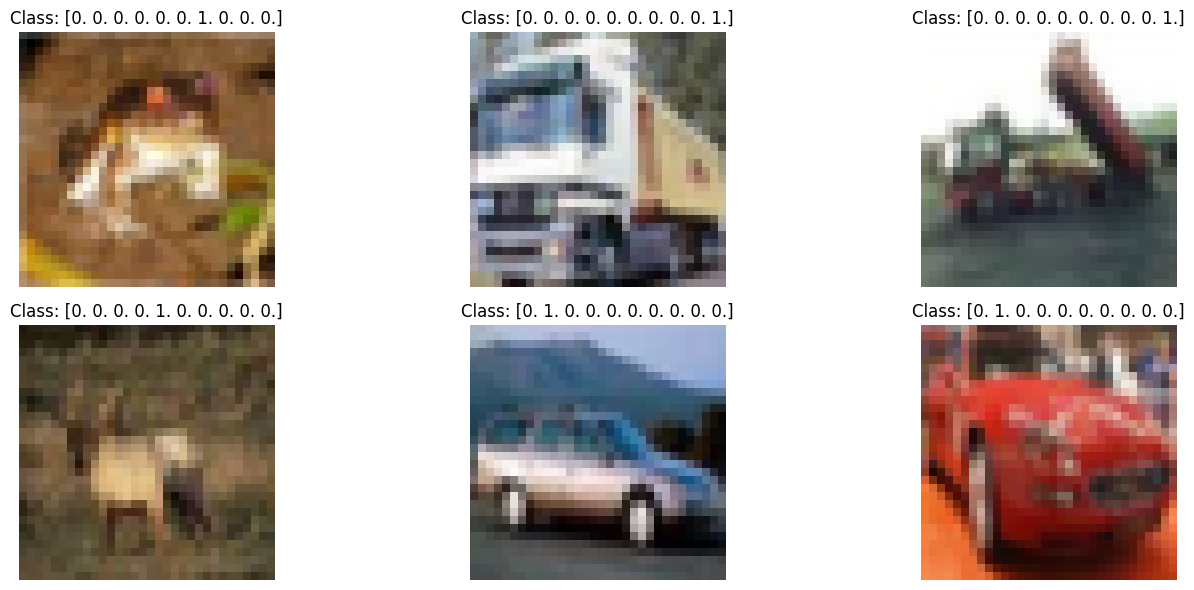

In [12]:
import matplotlib.pyplot as plt

# Create a figure and axes with the specified number of rows and columns
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Loop through the first ten images in the dataset and plot them
for i in range(2 * 3):
    # Plot the image
    axes[i].imshow(x_train[i])
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f"Class: {y_train[i]}")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Feature Scalling

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Model Architecture

In [9]:
model = Sequential()

# Convolutional layer with 32 filters, each of size 3x3
model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
# ReLU activation function
model.add(Activation('relu'))
# Batch normalization layer
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Global max pooling layer
model.add(GlobalMaxPooling2D())
# Dropout layer with dropout rate of 0.25
model.add(Dropout(0.25))

# Fully connected layer with number of units equal to the number of classes
model.add(Dense(num_classes))
# Softmax activation function for multi-class classification
model.add(Activation('softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                       

# Model Compilation & Training

In [10]:
opt = keras.optimizers.Adamax(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
history =model.fit(x_train, y_train,
              batch_size=500,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100
100/100 [==============================] - 22s 102ms/step - loss: 2.7542 - accuracy: 0.2269 - val_loss: 2.3865 - val_accuracy: 0.1000
Epoch 2/100
100/100 [==============================] - 10s 99ms/step - loss: 2.2112 - accuracy: 0.2782 - val_loss: 2.5137 - val_accuracy: 0.1003
Epoch 3/100
100/100 [==============================] - 10s 100ms/step - loss: 2.0177 - accuracy: 0.3222 - val_loss: 2.7578 - val_accuracy: 0.1046
Epoch 4/100
100/100 [==============================] - 10s 101ms/step - loss: 1.8948 - accuracy: 0.3546 - val_loss: 2.8670 - val_accuracy: 0.1525
Epoch 5/100
100/100 [==============================] - 10s 102ms/step - loss: 1.7952 - accuracy: 0.3850 - val_loss: 2.3529 - val_accuracy: 0.2192
Epoch 6/100
100/100 [==============================] - 10s 103ms/step - loss: 1.7096 - accuracy: 0.4118 - val_loss: 1.9665 - val_accuracy: 0.2983
Epoch 7/100
100/100 [==============================] - 11s 106ms/step - loss: 1.6284 - accuracy: 0.4362 - val_loss: 1.5547 - 

# Save the Model

In [13]:
model.save("cifar10_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Training and Validation Loss

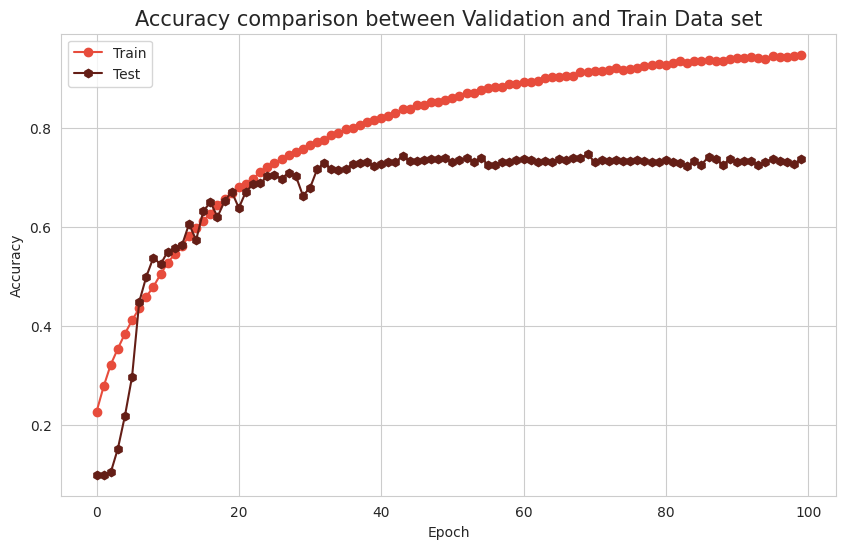

In [22]:
import seaborn as sb
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

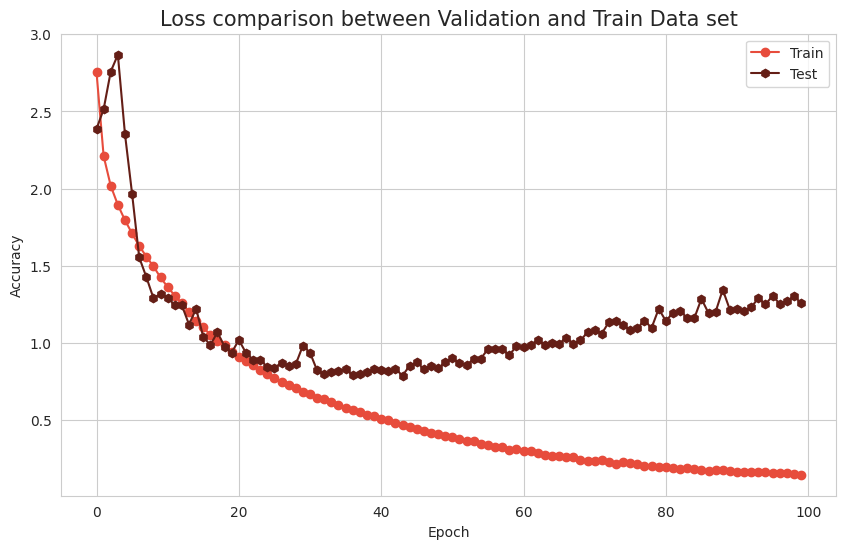

In [16]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Confusion Matrix

313/313 [==============================] - 2s 5ms/step


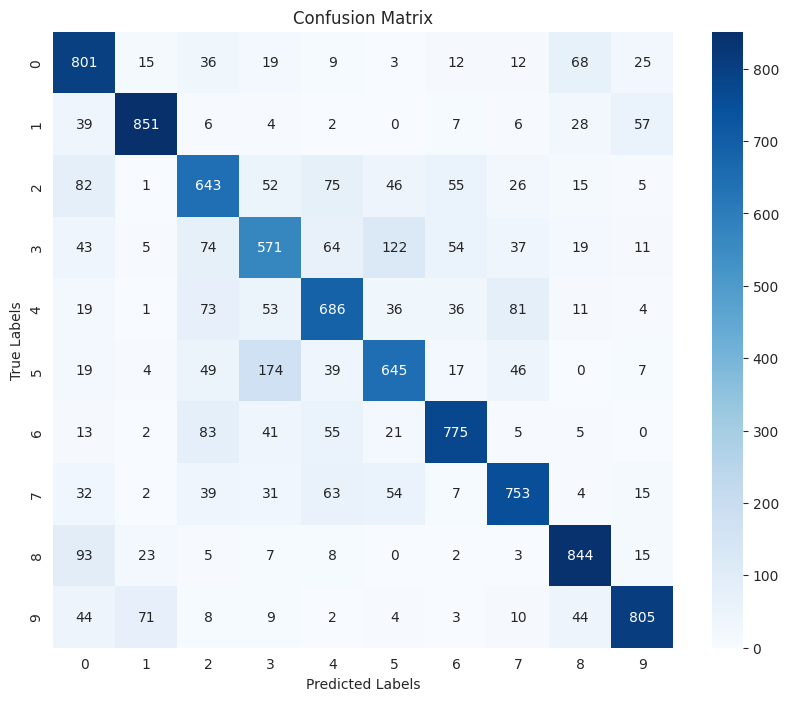

In [23]:
#predictions on the test data and store them in y_pred
y_pred = model.predict(x_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification Report

In [25]:
# Generate the classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1000
           1       0.87      0.85      0.86      1000
           2       0.63      0.64      0.64      1000
           3       0.59      0.57      0.58      1000
           4       0.68      0.69      0.68      1000
           5       0.69      0.65      0.67      1000
           6       0.80      0.78      0.79      1000
           7       0.77      0.75      0.76      1000
           8       0.81      0.84      0.83      1000
           9       0.85      0.81      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



# Predictive System

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random

def predict():
    # Randomly select an index from the test set
    idx = random.randint(0, len(x_test) - 1)

    # Select the image and its corresponding label
    image = x_test[idx]
    actual_label = y_test[idx]

    # Make predictions using the trained model
    predictions = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(predictions)

    # Define class names (assuming num_classes is defined)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']


    # Display the image
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Actual: {class_names[np.argmax(actual_label)]}, Predicted: {class_names[predicted_label]}')
    plt.show()


1/1 [==============================] - 0s 30ms/step


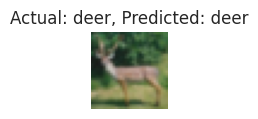

In [34]:
predict()

1/1 [==============================] - 0s 19ms/step


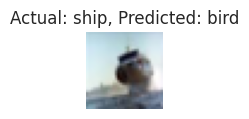

In [35]:
predict()

1/1 [==============================] - 0s 30ms/step


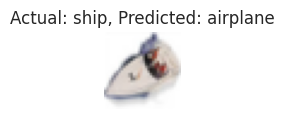

In [36]:
predict()